In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats.distributions import gamma
import math

In [3]:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [403]:
df=pd.read_csv("kc_house_data.csv")

In [404]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [382]:
df=df[(df['price']<df['price'].quantile(0.93))&(df['sqft_living']<df['sqft_living'].quantile(0.95))&
      (df['sqft_above']<df['sqft_above'].quantile(0.95))& 
      (df['sqft_living15']<df['sqft_living15'].quantile(0.95))]

In [383]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

In [277]:

df_price=df['price']/1000 #in thousands dollars
df_sqliv=df['sqft_living']/1000
df_sqlot=df['sqft_lot']/1000
df_sqabove=df['sqft_above']/1000
df_sqliv15=df['sqft_living15']/1000

def fun_na(data):
    data=data.fillna(value=data.mean(), inplace=False)
    return data

df_price=fun_na(df_price)
df_sqliv=fun_na(df_sqliv)
df_sqlot=fun_na(df_sqlot)
df_sqabove=fun_na(df_sqabove)

In [278]:
data=[df_price,df_sqliv,df_sqabove,df_sqliv15]

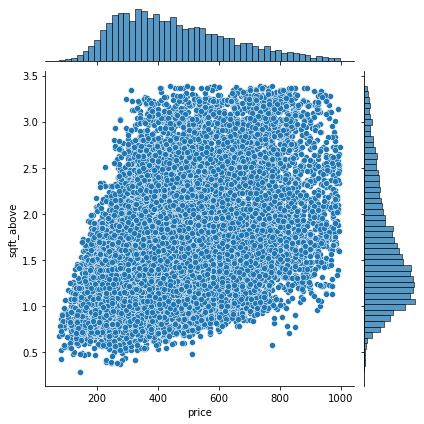

In [421]:
sns.jointplot(data=df, x='sqft_living', y='sqft_living15')

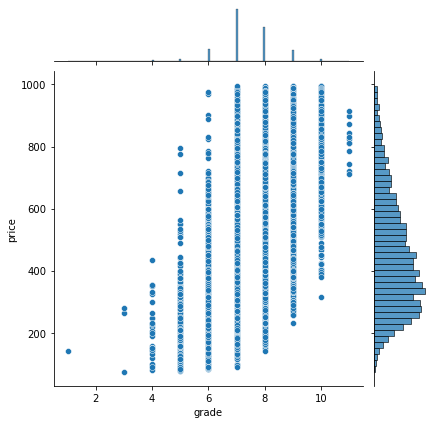

In [417]:
sns.jointplot(data=ddf, x='grade', y='price')

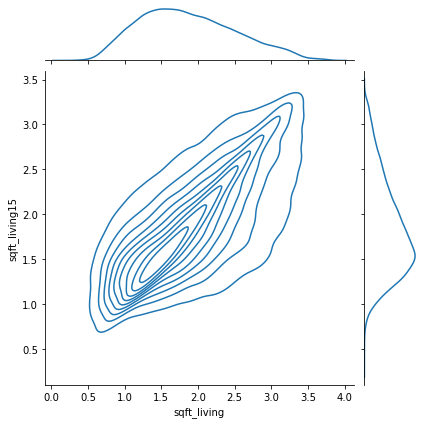

In [422]:
sns.jointplot(
    data=ddf,
    x='sqft_living', y='sqft_living15',
    kind="kde"
)

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

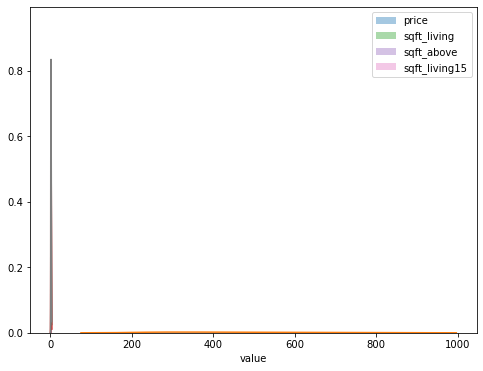

In [279]:
plt.figure(figsize=(8, 6))

for i in data:

    kernel = scipy.stats.gaussian_kde(i)

    min_amount, max_amount = i.min(), i.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(i, kde=False, norm_hist=True, label=i.name)
    plt.plot(x, kde_values)

    plt.ylabel('')
    plt.xlabel('value')

plt.legend()
plt.show()

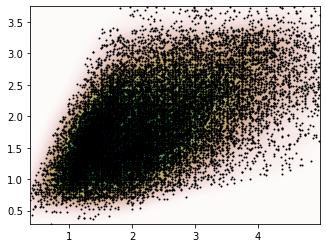

In [129]:
from scipy import stats
def measure(n):
    m1 = data[0][0]
    m2 = data[1][0]
    return m1+m2, m1-m2

m1 = data[0][0]
m2 = data[1][0]
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()



X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)


fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


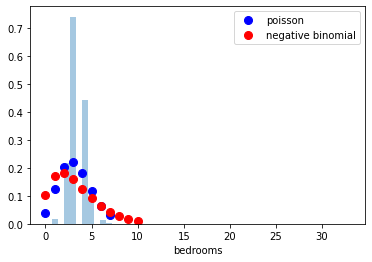

In [115]:
from scipy.stats import poisson, nbinom


fig, ax = plt.subplots(1, 1)
mu = df['bedrooms'].mean()

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson')

x = np.arange(nbinom.ppf(0.01, mu,0.5),
              nbinom.ppf(0.99, mu,0.5))
ax.plot(x, nbinom.pmf(x, mu,0.5), 'ro', ms=8, label='negative binomial')
sns.distplot(df['bedrooms'], kde=False, norm_hist=True)

plt.legend()
plt.show()

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


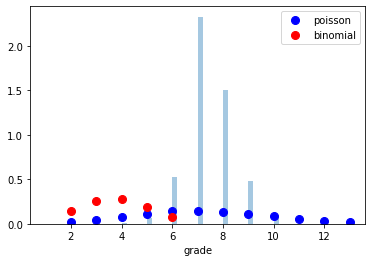

In [122]:
from scipy.stats import poisson, binom

fig, ax = plt.subplots(1, 1)
mu = df['grade'].mean()

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson')

x = np.arange(binom.ppf(0.01, mu,0.7),
              binom.ppf(0.99, mu,0.7))
ax.plot(x, binom.pmf(x, mu,0.5), 'ro', ms=8, label='binomial')
sns.distplot(df['grade'], kde=False, norm_hist=True)

plt.legend()
plt.show()

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


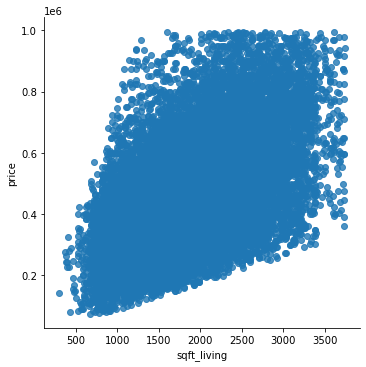

In [56]:
sns.lmplot('sqft_living','price',df[['price','sqft_living','sqft_living15']], fit_reg=False)

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


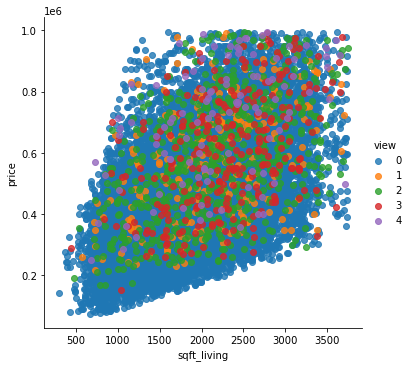

In [286]:
sns.lmplot('sqft_living','price', df[['price','view','bedrooms','condition','sqft_living','sqft_lot','sqft_above']], hue='view', fit_reg=False)

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


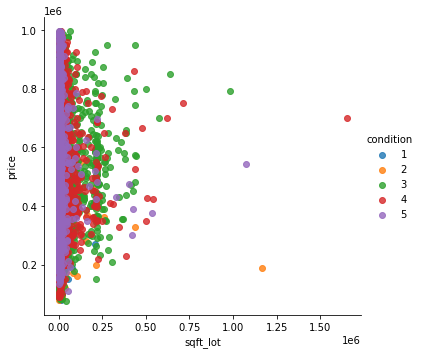

In [65]:
sns.lmplot('sqft_lot','price', df[['price','bedrooms','condition','sqft_living','sqft_lot','sqft_above']], hue='condition', fit_reg=False)

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


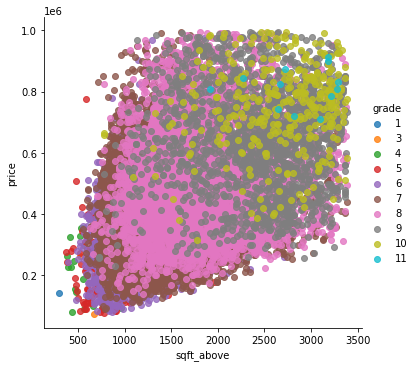

In [66]:
sns.lmplot('sqft_above','price', df[['price','bedrooms','grade','condition','sqft_living','sqft_lot','sqft_above']], hue='grade', fit_reg=False)

<ipython-input-124-7bf927f6ec41>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


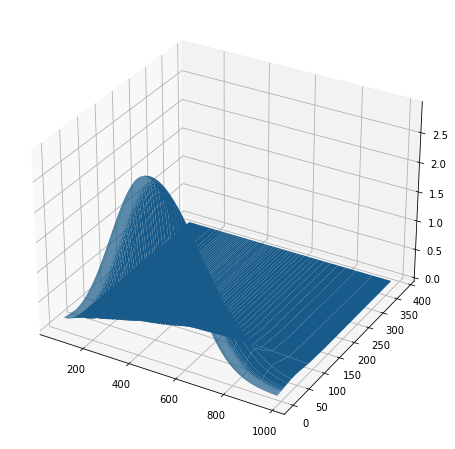

In [124]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal




x = sorted(df_price)[::100]
y = sorted(df_sqlot)[::100]
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([df_price.mean(), df_sqliv.mean()])
cov = np.cov([x,y])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
fig.show()

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


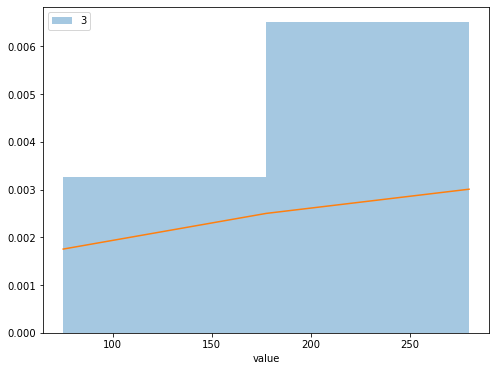

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


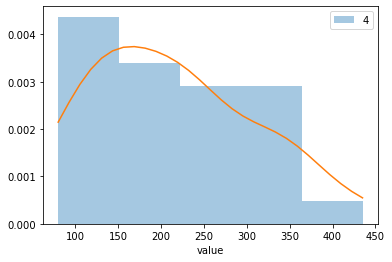

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


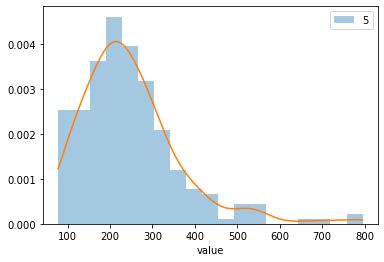

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


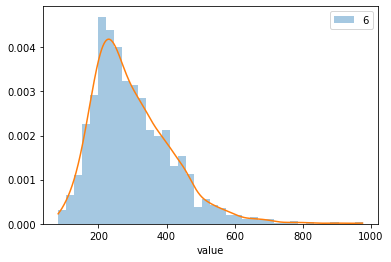

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


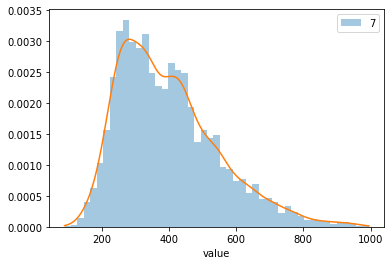

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


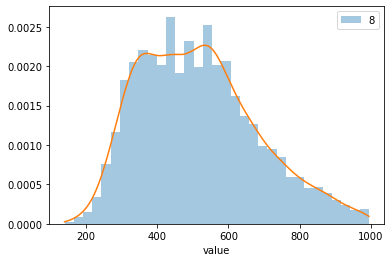

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


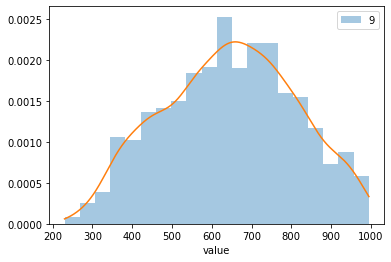

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


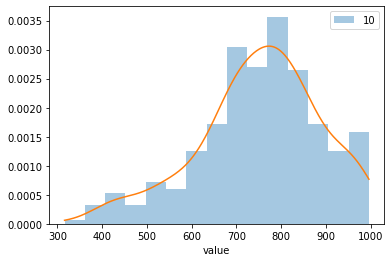

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


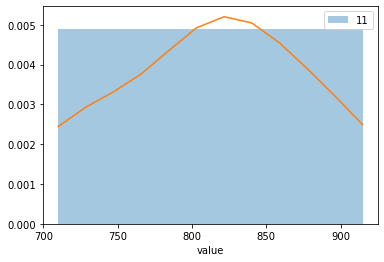

ValueError: `dataset` input should have multiple elements.

In [438]:
plt.figure(figsize=(8, 6))

for i in list(set(df['grade']))[1:]:
    a=ddf.loc[ddf['grade']==i,'price']

    kernel = scipy.stats.gaussian_kde(a)

    min_amount, max_amount = a.min(), a.max()
    x = np.linspace(min_amount, max_amount, len(a))
    kde_values = kernel(x)

    sns.distplot(a, kde=False, norm_hist=True, label=i)
    plt.plot(x, kde_values)

    plt.ylabel('')
    plt.xlabel('value')

    plt.legend()
    plt.show()

In [437]:
list(set(df['grade']))[1:]

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
custm = stats.rv_discrete(name='custm', values=(xk, pk))
poisson.stats(mu, moments='mvsk')

### Step 2 You need to make an estimation of multivariate mathematical expectation and variance.

In [131]:
df[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']].apply(np.mean)

price            451188.538494
sqft_living        1864.805049
sqft_lot          13334.327863
sqft_above         1608.521246
sqft_living15      1842.831809
dtype: float64

In [372]:
for i in [df_price,df_sqliv,df_sqlot,df_sqabove,df_sqliv15]:
    print('mathematical expectation of {0} = {1}, variance = {2}'.format(i.name, np.mean(i),np.var(i)))


mathematical expectation of price = 451.1885384937095, variance = 33845.207795195056
mathematical expectation of sqft_living = 1.8648050488684438, variance = 0.41795352735234015
mathematical expectation of sqft_lot = 13.334327862854806, variance = 1305.399999816155
mathematical expectation of sqft_above = 1.6085212460147384, variance = 0.368833509884161
mathematical expectation of sqft_living15 = 1.8428318089165285, variance = 0.27157976965249314


In [365]:
df[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']].apply(np.var)

price            3.384521e+04
sqft_living      4.179535e-01
sqft_lot         1.305400e+09
sqft_above       3.688335e+05
sqft_living15    2.715798e+05
dtype: float64

In [386]:
cov = np.cov(df[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']])

MemoryError: Unable to allocate 2.73 GiB for an array with shape (19133, 19133) and data type float64

In [387]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

MemoryError: Unable to allocate 2.73 GiB for an array with shape (19133, 19133) and data type float64

In [392]:
ddf=df
ddf['price']=df_price
ddf['sqft_living']=df_sqliv
ddf['sqft_lot']=df_sqlot
ddf['sqft_above']=df_sqabove
ddf['sqft_living15']=df_sqliv15

<AxesSubplot:>

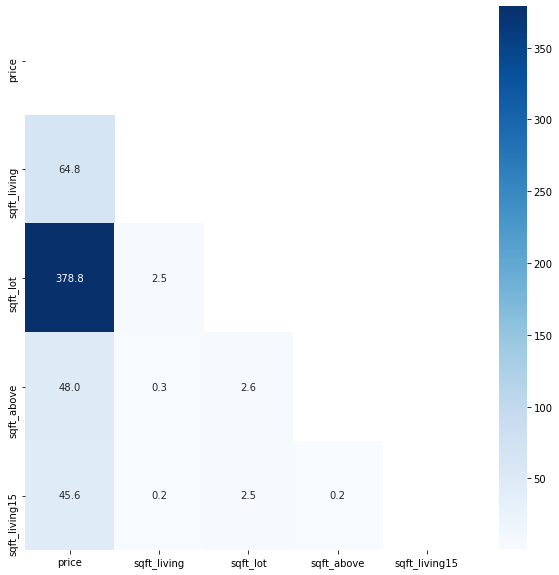

In [393]:
# selection of columns to build a correlation matrix
X_train = ddf[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']]
# building a diagonal mask
mask = np.zeros_like(X_train.cov(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(X_train.cov(), mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [149]:
def m_ex(i,degree=1):
    a=df.pivot_table(index = [i], aggfunc='size')/df[i].count()
    return sum(a.index**degree*np.array(a))

def var(i):
    return m_ex(i,2)-m_ex(i)**2

In [155]:
 for i in ['bedrooms','grade','view','condition']:
    print('mathematical expectation of {0} = {1}, variance = {2}'.format(i,m_ex(i),var(i)))


mathematical expectation of bedrooms = 3.276799247373648, variance = 0.7977876541007252
mathematical expectation of grade = 7.409031516228505, variance = 0.8563695894002947
mathematical expectation of view = 0.149636753253541, variance = 0.3531380324797529
mathematical expectation of condition = 3.415721528249621, variance = 0.4251999667748141


In [234]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [235]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [395]:
calcWithinGroupsCovariance(ddf['price'], df['sqft_living'], df['grade'])

21.913586832516998

In [394]:
calcBetweenGroupsCovariance(ddf['price'], df['sqft_living'], df['grade'])

91273.10898926132

### Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


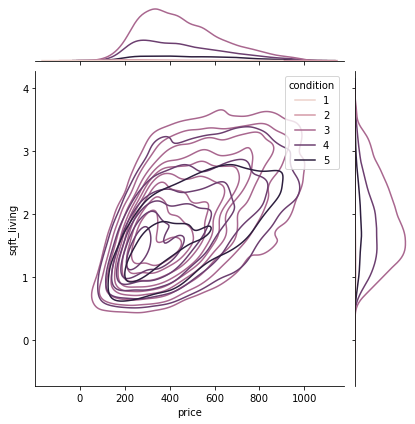

In [358]:
sns.jointplot(
    data=df,
    x='price', y='sqft_living',hue = 'condition',
    kind='kde'
)

In [396]:
dexp=pd.DataFrame(columns =( 'price','sqft_living','sqft_lot','sqft_above','sqft_living15'))
for i in set(ddf['grade']):
    dexp.loc[i]=ddf[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']].loc[ddf['grade']==i].apply(np.mean)
dexp

,price,sqft_living,sqft_lot,sqft_above,sqft_living15
1,142.000000,0.290000,20.875000,0.290000,1.620000
3,205.666667,0.596667,26.953000,0.596667,1.163333
4,214.381034,0.660483,22.101483,0.653586,1.525172
5,248.523971,0.983326,24.019909,0.944607,1.380570
6,299.985714,1.189297,12.588008,1.066306,1.385961
7,399.271895,1.677806,11.635989,1.397700,1.673008
8,515.193388,2.135897,13.172376,1.838505,2.036661
9,645.439844,2.621023,19.357941,2.421792,2.473653
10,750.608910,2.880257,23.584416,2.661964,2.705293
11,813.967083,3.104167,36.682750,2.857500,2.792500


In [397]:
dvar=pd.DataFrame(columns =( 'price','sqft_living','sqft_lot','sqft_above','sqft_living15'))
for i in set(ddf['grade']):
    dvar.loc[i]=ddf[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']].loc[ddf['grade']==i].apply(np.var)
dvar

,price,sqft_living,sqft_lot,sqft_above,sqft_living15
1,0.000000,0.000000,0.000000,0.000000,0.000000
3,8590.888889,0.003756,156.992288,0.003756,0.020422
4,8586.975589,0.050816,1518.180624,0.050913,0.257101
5,13890.041107,0.128901,7741.436292,0.116837,0.145050
6,13703.203664,0.153778,2012.909248,0.100341,0.128494
7,22043.078348,0.239674,764.152361,0.172855,0.139227
8,27269.368209,0.297400,1261.414953,0.279090,0.202196
9,27672.826011,0.239267,2210.579140,0.307516,0.255478
10,18766.071279,0.194736,2086.657003,0.256275,0.245145
11,3968.458919,0.116074,1339.121593,0.173269,0.349219


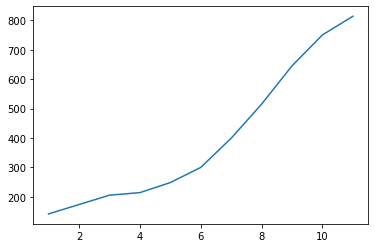

In [398]:
plt.plot(dexp['price'])

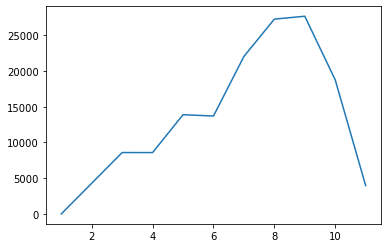

In [399]:
plt.plot(dvar['price'])

### Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [400]:
l=np.array(df_price)
data1 = [df['price'],df['bedrooms'],df['grade'],df['condition'],df['sqft_living'],df['sqft_lot'],df['sqft_above'],df['sqft_living15']]
k=0
se = 1/np.sqrt(l.size-3)
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
for i in data1:
    k+=1
    for j in data1[k:]:
        r, p = stats.pearsonr(i,j)
        print(i.name,j.name)
        print("p-value:\t", p)
        print("cor:\t\t", r)
        r_z = np.arctanh(r)
        lo_z, hi_z = r_z-z*se, r_z+z*se
        lo_z, hi_z
        lo, hi = np.tanh((lo_z, hi_z))
        print("interval:\t", lo, hi)
        print()

price bedrooms
p-value:	 3.550951733687011e-269
cor:		 0.24941459621240636
interval:	 0.23607920372919905 0.2626560624311267

price grade
p-value:	 0.0
cor:		 0.5601213163061177
interval:	 0.5503193440136196 0.5697689218286628

price condition
p-value:	 5.687188604612436e-20
cor:		 0.06608280794746049
interval:	 0.051961734866406276 0.08017746051528181

price sqft_living
p-value:	 0.0
cor:		 0.5451363399912522
interval:	 0.5350999555509611 0.5550188621505114

price sqft_lot
p-value:	 3.0544484137164165e-15
cor:		 0.056988479005906804
interval:	 0.0428533547990387 0.07110079308742093

price sqft_above
p-value:	 0.0
cor:		 0.4295358572249519
interval:	 0.4179096967852364 0.4410213507415855

price sqft_living15
p-value:	 0.0
cor:		 0.4756356479221565
interval:	 0.46459713103935046 0.48652636989000886

bedrooms grade
p-value:	 0.0
cor:		 0.28219354217339077
interval:	 0.2690998376117229 0.29518295064397404

bedrooms condition
p-value:	 4.159875162071514e-09
cor:		 0.042476502985345575
inte

### Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target -predictors).


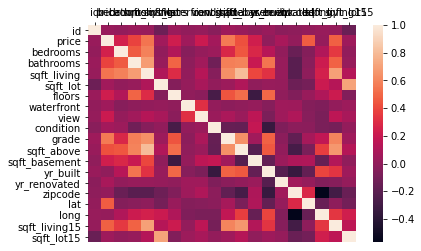

In [401]:
data2=df[['price','bedrooms','grade','condition','sqft_living','sqft_lot','sqft_above','sqft_living15']]

corrmat = df.corr()

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

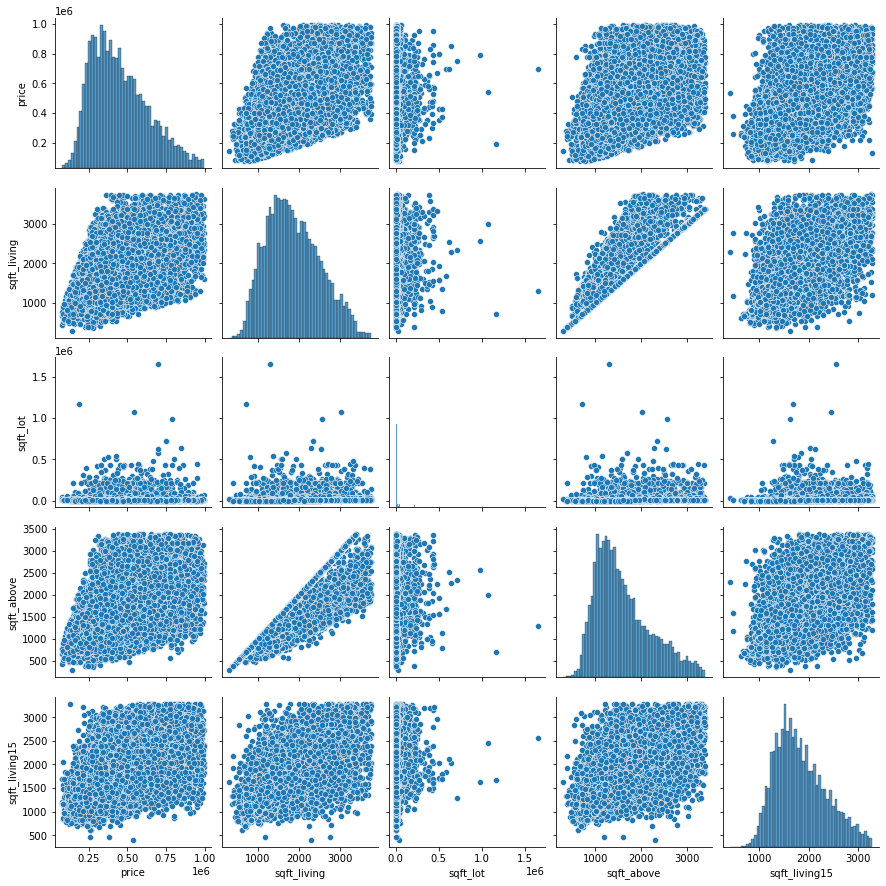

In [271]:
sns.pairplot(df[['price','sqft_living','sqft_lot','sqft_above','sqft_living15']])

In [402]:
cordf=corrmat.sort_values(by=['price'],ascending=False)
cordf.loc[cordf['price']>0.1]['price']

price            1.000000
grade            0.560121
sqft_living      0.545136
sqft_living15    0.475636
lat              0.461546
sqft_above       0.429536
bathrooms        0.386109
bedrooms         0.249415
sqft_basement    0.235616
floors           0.230044
view             0.209822
Name: price, dtype: float64

In [287]:
corrmat

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.027661,0.011910,0.036553,0.023994,-0.128442,0.035591,0.002092,0.019572,-0.027875,0.048188,0.028014,-0.003862,0.028658,-0.017992,-0.007172,0.007751,0.021392,0.016074,-0.142944
price,0.027661,1.000000,0.249415,0.386109,0.545136,0.056988,0.230044,0.055855,0.209822,0.066083,0.560121,0.429536,0.235616,-0.000598,0.087011,0.011806,0.461546,0.014045,0.475636,0.044515
bedrooms,0.011910,0.249415,1.000000,0.459082,0.584252,0.006604,0.122214,-0.030872,0.016299,0.042477,0.282194,0.443050,0.279568,0.136409,0.002751,-0.141483,-0.041641,0.117233,0.346552,0.004321
bathrooms,0.036553,0.386109,0.459082,1.000000,0.684502,0.024184,0.489084,-0.010610,0.061972,-0.120740,0.577900,0.595511,0.208080,0.543509,0.021486,-0.203309,-0.023919,0.217843,0.482905,0.025017
sqft_living,0.023994,0.545136,0.584252,0.684502,1.000000,0.108870,0.298870,0.005393,0.132030,-0.039668,0.639656,0.809637,0.398310,0.325953,0.024435,-0.200822,-0.009839,0.246529,0.694923,0.126175
sqft_lot,-0.128442,0.056988,0.006604,0.024184,0.108870,1.000000,-0.043396,0.018156,0.084662,0.005082,0.043450,0.116543,-0.001016,0.023511,0.017376,-0.127563,-0.100673,0.210669,0.131346,0.707678
floors,0.035591,0.230044,0.122214,0.489084,0.298870,-0.043396,1.000000,-0.003957,-0.020998,-0.268830,0.439384,0.522073,-0.318689,0.503052,-0.004561,-0.053804,0.028543,0.107683,0.221281,-0.048974
waterfront,0.002092,0.055855,-0.030872,-0.010610,0.005393,0.018156,-0.003957,1.000000,0.318488,0.012938,-0.012447,-0.003430,0.014333,-0.039166,0.051008,0.044378,-0.046306,-0.060291,0.008788,0.038573
view,0.019572,0.209822,0.016299,0.061972,0.132030,0.084662,-0.020998,0.318488,1.000000,0.032613,0.099408,0.037461,0.161102,-0.077540,0.056100,0.109891,-0.029868,-0.084275,0.163306,0.084112
condition,-0.027875,0.066083,0.042477,-0.120740,-0.039668,0.005082,-0.268830,0.012938,0.032613,1.000000,-0.152739,-0.160888,0.185442,-0.340666,-0.061618,-0.014197,-0.017343,-0.082109,-0.095959,0.012667


In [260]:
cordf=corrmat.sort_values(by=['grade'])
cordf.loc[cordf['grade']>0.35]['grade']

floors           0.439384
yr_built         0.484423
price            0.560121
bathrooms        0.577900
sqft_living15    0.597557
sqft_living      0.639656
sqft_above       0.644433
grade            1.000000
Name: grade, dtype: float64

In [261]:
cordf=corrmat.sort_values(by=['sqft_living'])
cordf.loc[cordf['sqft_living']>0.35]['sqft_living']

sqft_basement    0.398310
price            0.545136
bedrooms         0.584252
grade            0.639656
bathrooms        0.684502
sqft_living15    0.694923
sqft_above       0.809637
sqft_living      1.000000
Name: sqft_living, dtype: float64

In [262]:
cordf=corrmat.sort_values(by=['lat'])
cordf.loc[cordf['lat']>0.35]['lat']

price    0.461546
lat      1.000000
Name: lat, dtype: float64

In [264]:
df[['price','grade','lat']].corr()

,price,grade,lat
price,1.000000,0.560121,0.461546
grade,0.560121,1.000000,0.076286
lat,0.461546,0.076286,1.000000


In [310]:
df[['price','sqft_living']]=df[['price','sqft_living']]/1000

In [311]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('price ~ grade+lat+sqft_living', data=df[['price','grade','lat','sqft_living']]).fit()
print(Intercept)
print(model.summary())

print(model.rsquared**.5)
print(model.rsquared_adj**.5)

Intercept     -27407.243321
grade             58.841789
lat              572.629141
sqft_living      102.490430
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     8328.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:46:49   Log-Likelihood:            -1.1893e+05
No. Observations:               19133   AIC:                         2.379e+05
Df Residuals:                   19129   BIC:                         2.379e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---

In [314]:
yy=df['grade']*model.params.grade+df['lat']*model.params.lat+df['sqft_living']*model.params.sqft_living+model.params.Intercept

### Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).

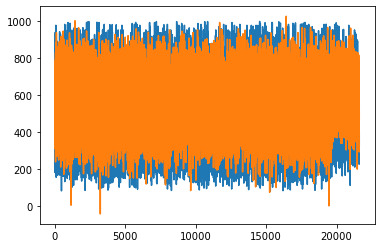

In [325]:
plt.plot(df['price'])
plt.plot(yy+100)

In [316]:
res=df['price']-yy

### Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).

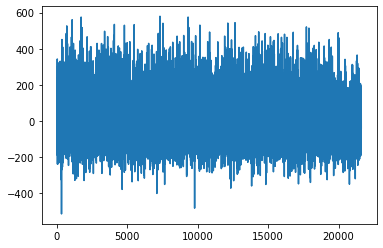

In [319]:
plt.plot(res)

In [330]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(df['price'], yy, sample_weight=None, multioutput='uniform_average', squared=False)
rmse

121.1466632025431

In [331]:
mse=mean_squared_error(df['price'], yy, sample_weight=None, multioutput='uniform_average', squared=True)
mse

14676.51400511041

In [334]:
yy.abs().mean()

451.22938183684886

C:\Users\rf129192\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


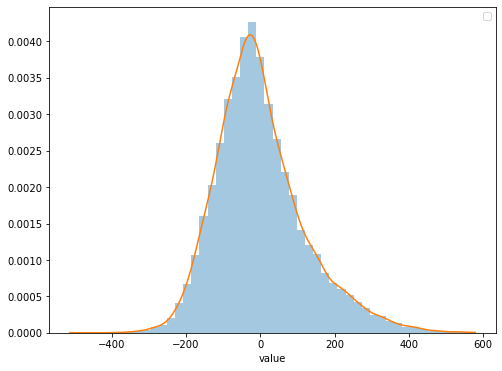

In [332]:
plt.figure(figsize=(8, 6))



kernel = scipy.stats.gaussian_kde(res)

min_amount, max_amount = res.min(), res.max()
x = np.linspace(min_amount, max_amount, len(res))
kde_values = kernel(x)

sns.distplot(res, kde=False, norm_hist=True)
plt.plot(x, kde_values)

plt.ylabel('')
plt.xlabel('value')

plt.legend()
plt.show()

In [349]:
from scipy.stats import ks_2samp,chisquare


x = norm.rvs(0, res.std(),size=1000)


ks_2samp(x, res)

KstestResult(statistic=0.07474426383734911, pvalue=4.6213852250645035e-05)

In [350]:
res.mean()

-3.857300580909661e-11

In [352]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(res, axis=0)

1.9863238545456479

In [353]:
statsmodels.tsa.stattools.adfuller(res)

(-67.36200247256393,
 0.0,
 3,
 19129,
 {'1%': -3.4306918985693393,
  '5%': -2.8616911067723745,
  '10%': -2.5668504300718857},
 237293.0653334251)

In [355]:
percs = np.linspace(0, 100, 100)
data1 = np.percentile(res, percs)
ks = scipy.stats.kstest(data1, 'norm',args=scipy.stats.norm.fit(res))

In [356]:
ks

KstestResult(statistic=0.07406890740833105, pvalue=0.6159894542173784)

In [405]:
res.mean()

-3.857300580909661e-11